In [85]:
import pandas as pd
import numpy as np
import xarray as xr

import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
file = xr.open_dataset('/Users/victoriaford/Downloads/CWOP_AP153.nc')
df = file.to_dataframe()
df = df.reset_index()
df['month'] = pd.to_datetime(df['time']).dt.month

df

,station,time,tas,hurs,sfcWind,sfcWind_dir,ps_altimeter,tas_qc,sfcWind_qc,tdps_derived,ps_derived,elevation,lat,lon,month
0,CWOP_AP153,2003-09-16 16:30:00,283.16,53.0,0.00,289.0,NaN,nan,nan,273.93,NaN,1406.0424,41.543,-120.5332,9
1,CWOP_AP153,2003-09-16 17:00:00,284.83,44.0,0.90,263.0,NaN,nan,nan,272.88,NaN,1406.0424,41.543,-120.5332,9
2,CWOP_AP153,2003-09-16 17:30:00,287.05,39.0,5.36,305.0,NaN,nan,nan,273.22,NaN,1406.0424,41.543,-120.5332,9
3,CWOP_AP153,2003-09-16 18:00:00,287.61,37.0,4.47,296.0,NaN,nan,nan,273.00,NaN,1406.0424,41.543,-120.5332,9
4,CWOP_AP153,2003-09-16 18:30:00,288.72,35.0,3.13,254.0,NaN,nan,nan,273.22,NaN,1406.0424,41.543,-120.5332,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8930,CWOP_AP153,2005-03-08 18:00:00,281.49,66.0,0.00,247.0,86725.20,nan,nan,275.44,73203.68,1406.0424,41.543,-120.5332,3
8931,CWOP_AP153,2005-03-08 18:15:00,282.61,62.0,0.00,342.0,86725.20,nan,nan,275.62,73203.68,1406.0424,41.543,-120.5332,3
8932,CWOP_AP153,2005-03-08 18:30:00,283.72,60.0,0.00,224.0,86725.20,nan,nan,276.20,73203.68,1406.0424,41.543,-120.5332,3
8933,CWOP_AP153,2005-03-08 20:15:00,290.38,35.0,0.90,349.0,86639.45,nan,nan,274.70,73131.30,1406.0424,41.543,-120.5332,3


In [3]:
# first part
# works on monthly level
# compares anomalies of monthly median values
# standardizes against IQR range and compares from middle of distribution outwards
# assymmetries are flagged if severe

In [ ]:
# second part
# compares all obs within calendar month (all Jans, etc.)
# histogram created from all obs and gaussian distribution is fitted
# threshold values are determined by using positions of where fitted frequency falls below y=0.1
# and rounding outwards until next integer plus 1
# going outwards from center, distribution scanned for gaps which occur beyond threshold
# obs beyond gap are flagged

# now uses guassian-hermite series


In [57]:
var = 'tas'
df_month = df.loc[df['month'] == 4]

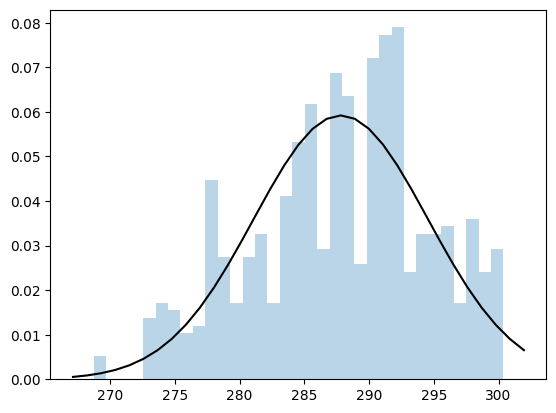

In [71]:
num_bins = int(df_month[var].max()) + 1 - int(df_month[var].min())
# num_bins = 10
mu, std = norm.fit(df_month[var].dropna()) 
plt.hist(df_month[var], bins=num_bins, density=True, alpha=0.3) # Plot the histogram.
xmin, xmax = plt.xlim()

x = np.linspace(xmin, xmax, num_bins)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k') # Plot the PDF.

In [84]:
df_month[var]

2516    277.05
2517    277.61
2518    277.61
2519    278.16
2520    278.16
         ...  
3118    296.49
3119    295.94
3120    296.49
3121    297.05
3122    297.05
Name: tas, Length: 607, dtype: float64

In [88]:
kernel = stats.gaussian_kde(df_month[var])

In [93]:
kernel(np.linspace(260,320))

array([1.52269813e-08, 2.65110037e-07, 3.02123935e-06, 2.25580501e-05,
       1.10574329e-04, 3.58117653e-04, 7.85389741e-04, 1.27921283e-03,
       1.97541239e-03, 3.58156483e-03, 6.57023968e-03, 1.02726553e-02,
       1.38170383e-02, 1.74164929e-02, 2.13145006e-02, 2.45412861e-02,
       2.65551874e-02, 2.86068631e-02, 3.21199442e-02, 3.72573695e-02,
       4.32849741e-02, 4.90787075e-02, 5.35208073e-02, 5.63030607e-02,
       5.79134771e-02, 5.79646021e-02, 5.45821974e-02, 4.71821262e-02,
       3.86148385e-02, 3.23308626e-02, 2.86915343e-02, 2.54703462e-02,
       2.05666710e-02, 1.38238739e-02, 7.17295738e-03, 2.71185144e-03,
       7.18506971e-04, 1.30256373e-04, 1.59296645e-05, 1.30307345e-06,
       7.09228876e-08, 2.55931933e-09, 6.10764876e-11, 9.61989200e-13,
       9.98380855e-15, 6.81764011e-17, 3.05941740e-19, 9.01209150e-22,
       1.74085860e-24, 2.20328413e-27])

In [94]:
6.57023968e-03

0.00657023968

In [95]:
1.02726553e-02

0.0102726553

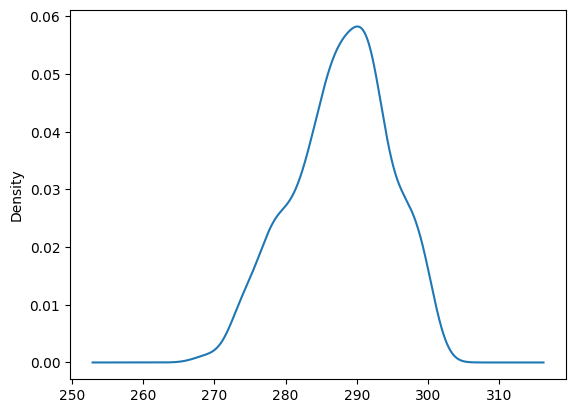

In [83]:
# df_month[var].plot.hist(bins=num_bins, density=True);
df_month[var].plot.kde();

In [25]:
df_month.loc[df_month[var] < 270]

,station,time,tas,hurs,sfcWind,sfcWind_dir,ps_altimeter,tas_qc,sfcWind_qc,tdps_derived,ps_derived,elevation,lat,lon,month
3088,CWOP_AP153,2004-04-30 13:50:00,268.72,69.0,0.0,68.0,86267.85,nan,nan,263.82,72817.64,1406.0424,41.543,-120.5332,4
3089,CWOP_AP153,2004-04-30 14:00:00,268.72,70.0,0.0,68.0,86267.85,nan,nan,264.01,72817.64,1406.0424,41.543,-120.5332,4
3090,CWOP_AP153,2004-04-30 14:20:00,269.27,72.0,0.0,68.0,86296.43,nan,nan,264.90,72841.76,1406.0424,41.543,-120.5332,4
